In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta

sns.set_style("whitegrid")

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = end - timedelta(days=365)

In [5]:
tech_data = yf.download(tech_list, start=start, end=end)['Close']
tech_data.head()

/var/folders/rp/r7rm8rzn5mvdkpykf4c15d540000gn/T/ipykernel_4207/1534306379.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tech_data = yf.download(tech_list, start=start, end=end)['Close']
[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-08-05,208.295868,161.020004,159.872498,392.143463
2024-08-06,206.265350,161.929993,159.772964,396.569519
2024-08-07,208.843323,162.770004,159.981964,395.398468
2024-08-08,212.317047,165.800003,163.057190,399.626099
2024-08-09,215.233444,166.940002,164.599808,402.930756


In [6]:
aapl = yf.download('AAPL', start=start, end=end)
aapl.describe()

/var/folders/rp/r7rm8rzn5mvdkpykf4c15d540000gn/T/ipykernel_4207/3611647548.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,221.526967,223.756494,218.948719,221.200808,5.322216e+07
std,15.952032,15.463950,16.243213,15.978306,2.753911e+07
min,172.194199,190.090729,168.988411,171.724805,2.323470e+07
25%,209.949997,212.130005,207.720001,209.929993,3.948070e+07
50%,223.121780,225.047127,220.730550,223.460945,4.640410e+07
75%,232.309601,233.907786,229.034917,232.040255,5.574070e+07
max,258.396667,259.474086,257.010028,257.568678,3.186799e+08


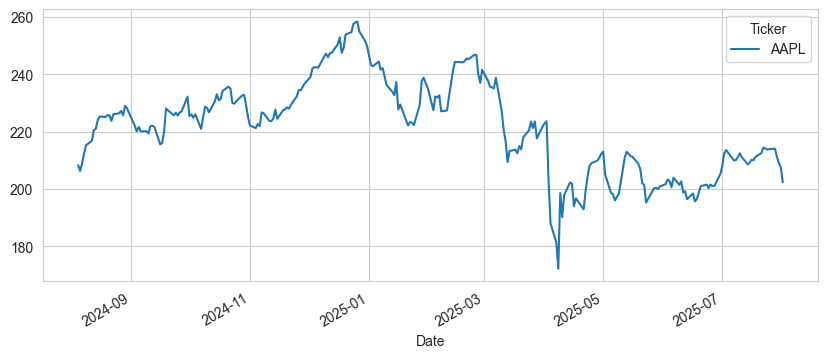

In [7]:
aapl['Close'].plot(figsize=(10,4), legend=True)
plt.show()

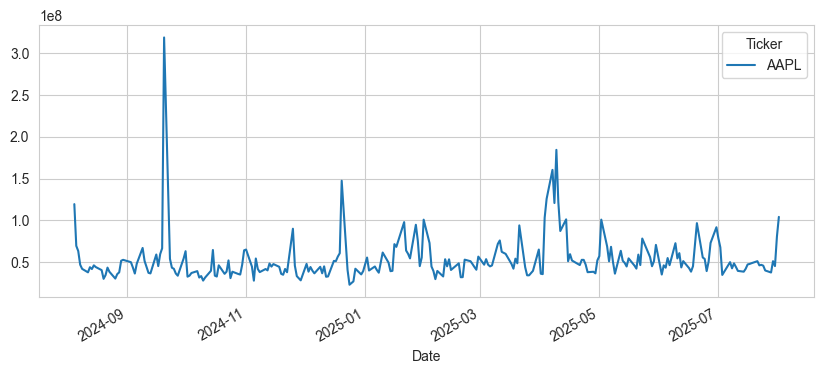

In [8]:
aapl['Volume'].plot(figsize=(10,4), legend=True)
plt.show()

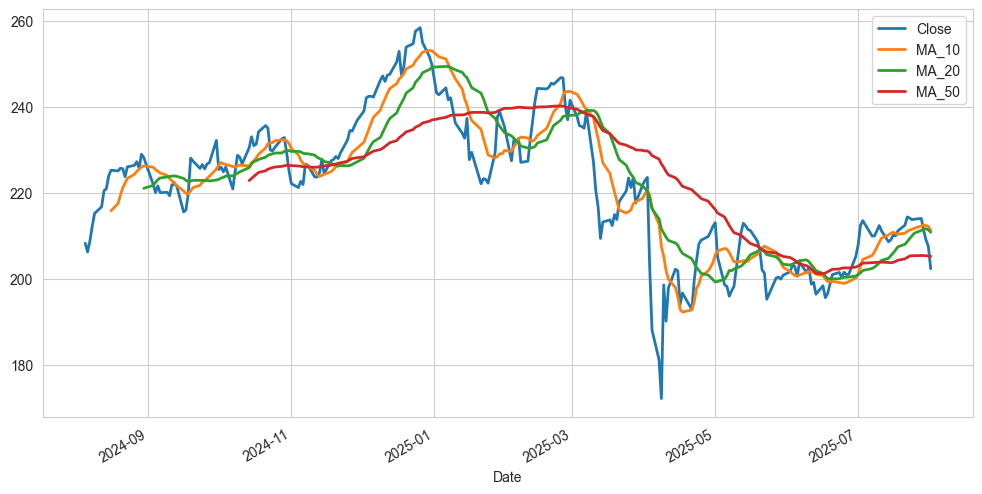

In [9]:
aapl = tech_data['AAPL'].to_frame(name='Close')
ma_days = [10, 20, 50]
for ma in ma_days:
  column_name = f'MA_{ma}'
  aapl[column_name] = aapl['Close'].rolling(window=ma).mean()

aapl[['Close', 'MA_10', 'MA_20', 'MA_50']].plot(figsize=(12, 6), linewidth=2)
plt.show()


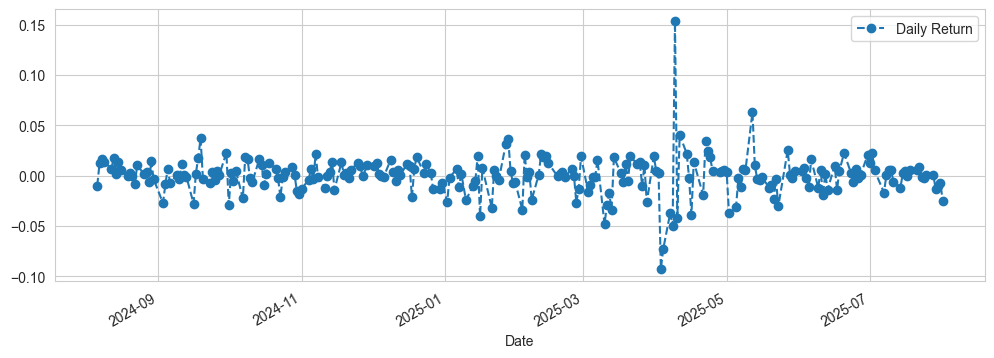

In [10]:
aapl['Daily Return'] = aapl['Close'].pct_change()
aapl['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')
plt.show()

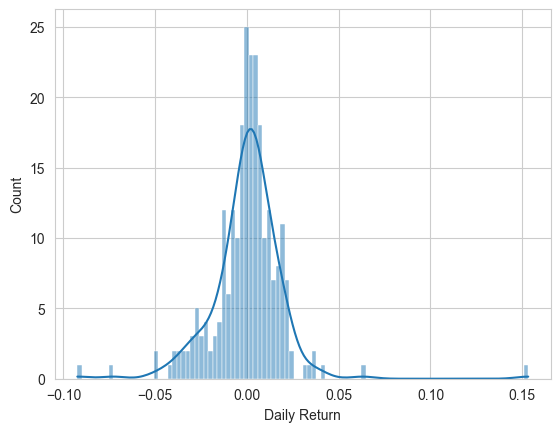

In [11]:
sns.histplot(aapl['Daily Return'].dropna(), bins=100, kde=True)
plt.show()

In [12]:
closing_df = yf.download(tech_list, start=start, end=end)['Close']
closing_df.head()

/var/folders/rp/r7rm8rzn5mvdkpykf4c15d540000gn/T/ipykernel_4207/790168298.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  closing_df = yf.download(tech_list, start=start, end=end)['Close']
[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-08-05,208.295868,161.020004,159.872498,392.143463
2024-08-06,206.265366,161.929993,159.772949,396.569519
2024-08-07,208.843323,162.770004,159.981979,395.398499
2024-08-08,212.317047,165.800003,163.057205,399.626099
2024-08-09,215.233444,166.940002,164.599808,402.930725


In [13]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-08-05,NaN,NaN,NaN,NaN
2024-08-06,-0.009748,0.005651,-0.000623,0.011287
2024-08-07,0.012498,0.005187,0.001308,-0.002953
2024-08-08,0.016633,0.018615,0.019222,0.010692
2024-08-09,0.013736,0.006876,0.009460,0.008269


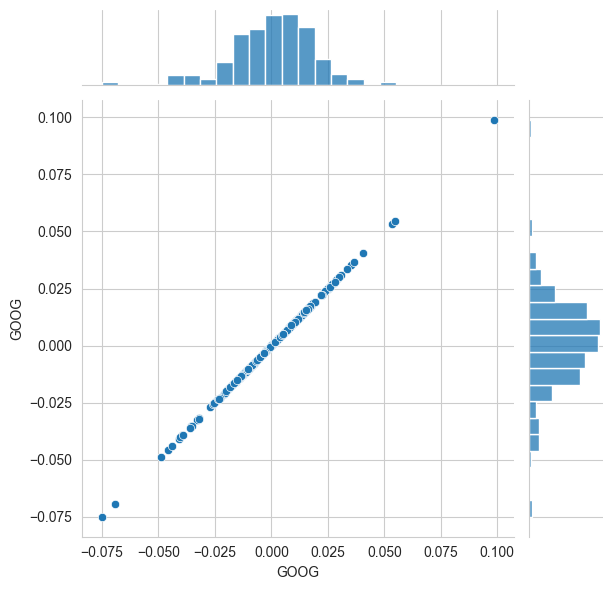

In [14]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter')
plt.show()

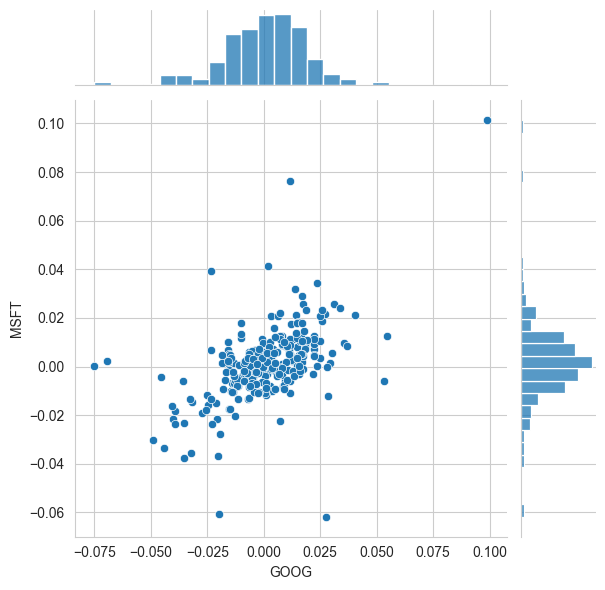

In [15]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')
plt.show()

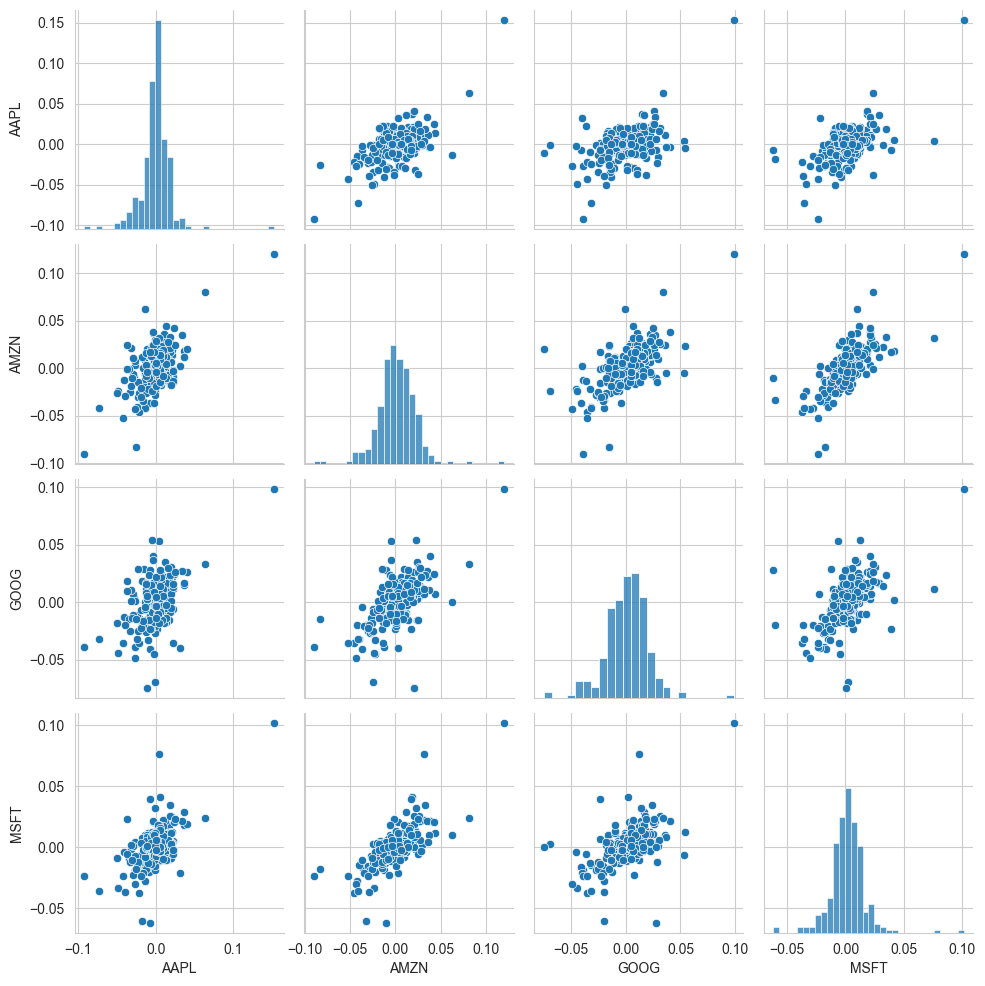

In [16]:
sns.pairplot(tech_rets.dropna())
plt.show()

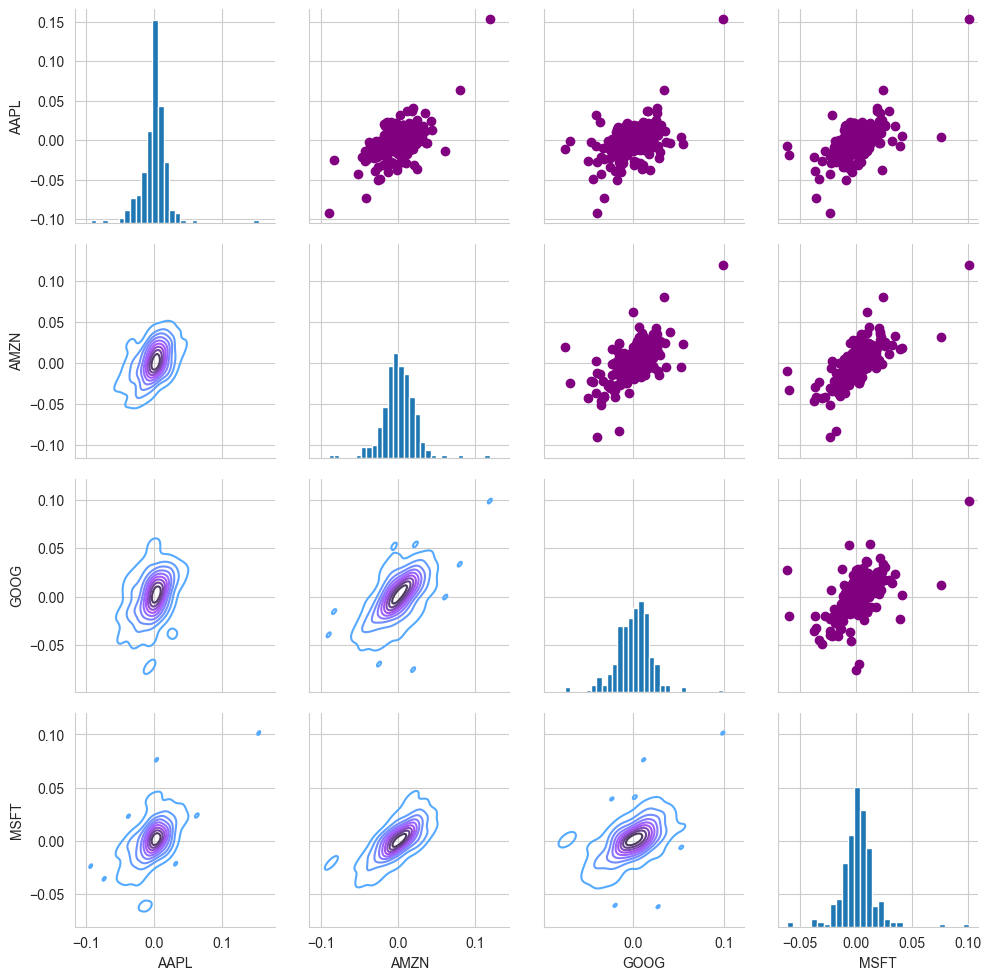

In [17]:
price_fig = sns.PairGrid(tech_rets.dropna())
price_fig.map_upper(plt.scatter, color='purple')
price_fig.map_lower(sns.kdeplot, cmap='cool_d')
price_fig.map_diag(plt.hist, bins=30)
plt.show()

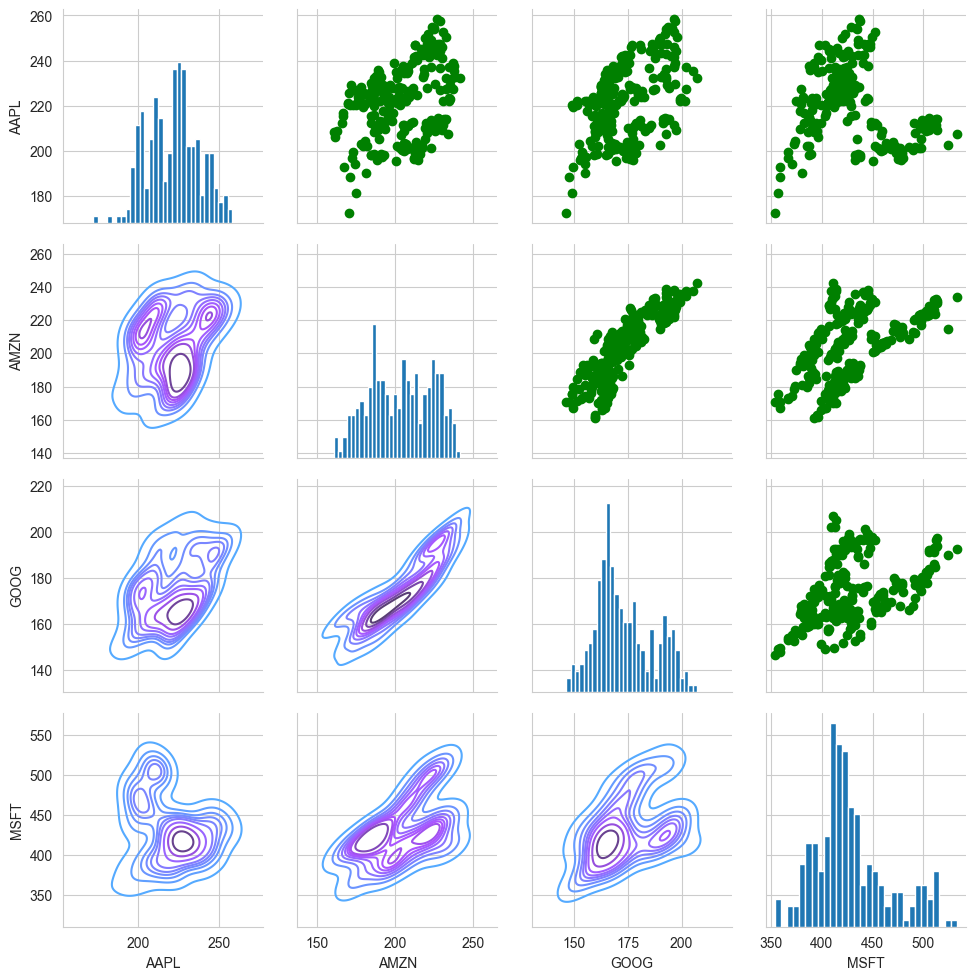

In [18]:
price_fig = sns.PairGrid(closing_df)
price_fig.map_upper(plt.scatter, color='green')
price_fig.map_lower(sns.kdeplot, cmap='cool_d')
price_fig.map_diag(plt.hist, bins=30)
plt.show()

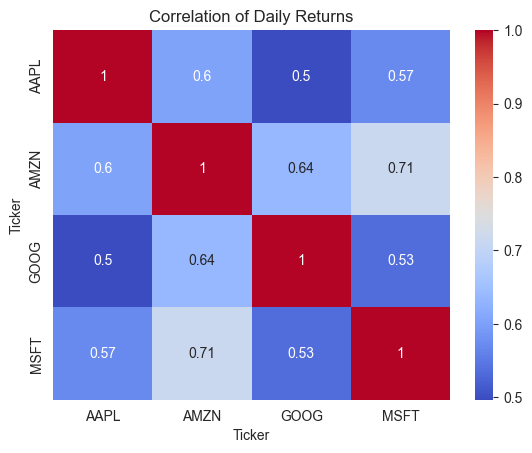

In [19]:
sns.heatmap(tech_rets.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Daily Returns")
plt.show()

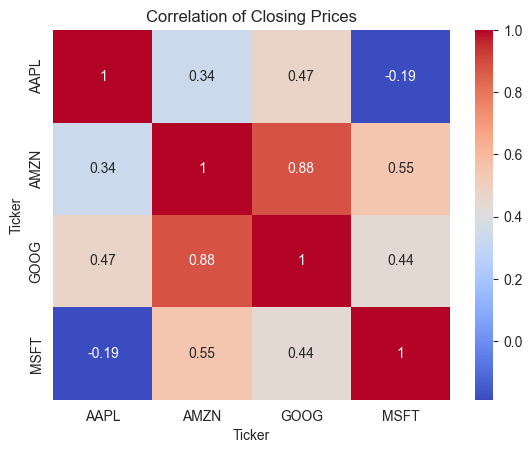

In [20]:
sns.heatmap(closing_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Closing Prices")
plt.show()

In [21]:
expected_returns = tech_rets.mean()
risk = tech_rets.std()

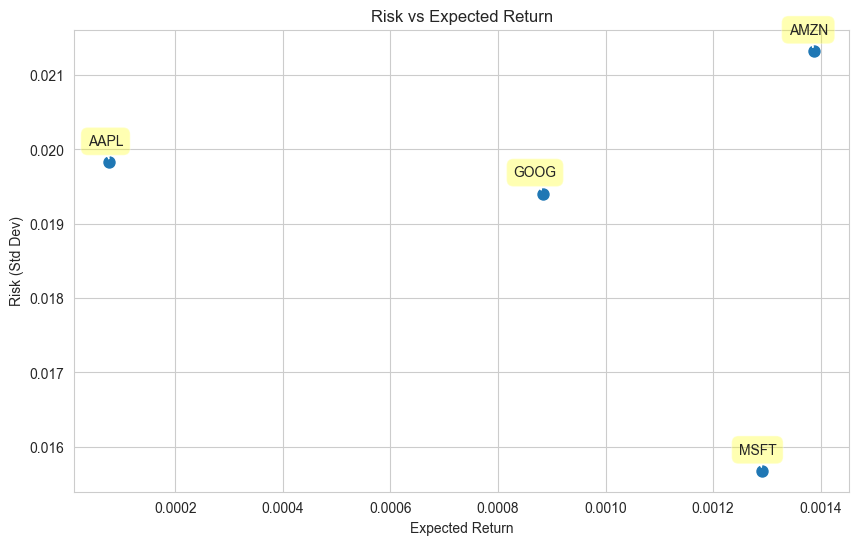

In [22]:
plt.figure(figsize=(10, 6))
area = np.pi * 20
plt.scatter(expected_returns, risk, s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk (Std Dev)')
plt.title('Risk vs Expected Return')

for label, x, y in zip(expected_returns.index, expected_returns, risk):
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(10, 10),  # テキストのオフセット
                 textcoords='offset points',
                 ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.show()

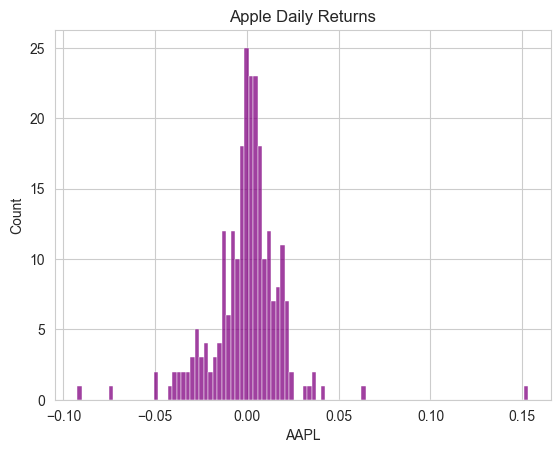

In [23]:
sns.histplot(tech_rets['AAPL'], bins=100, color='purple')
plt.title('Apple Daily Returns')
plt.show()

In [24]:
var_95 = tech_rets['AAPL'].quantile(0.05)
print(f'95%信頼区間のVaR: {var_95:.4f}')

95%信頼区間のVaR: -0.0310


In [25]:
days = 365
dt = 1/days
mu = tech_rets['GOOG'].mean()
sigma = tech_rets['GOOG'].std()

In [26]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    for t in range(1, days):
        shock = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift = mu * dt
        price[t] = price[t-1] + (price[t-1] * (drift + shock))
    
    return price

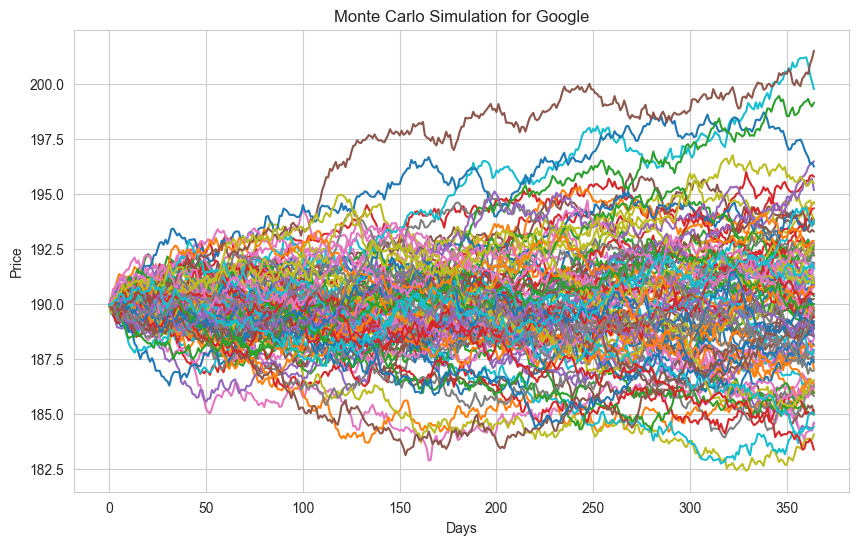

In [27]:
start_price = closing_df['GOOG'].iloc[-1]

plt.figure(figsize=(10,6))
for _ in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for Google')
plt.show()

In [28]:
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[-1]

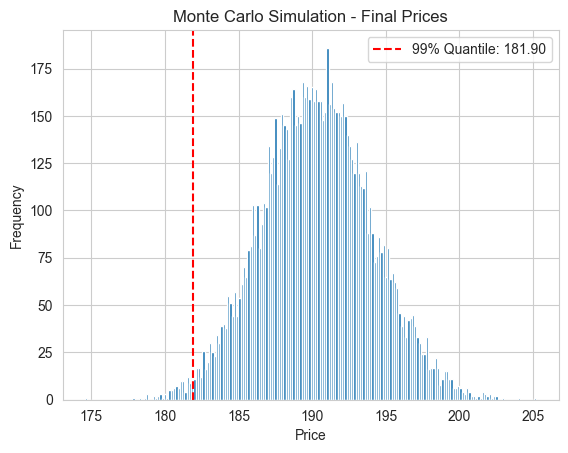

Start Price: 189.95
99% VaR: 8.05


In [29]:
q = np.percentile(simulations, 1)  # 1% Quantile → 99%信頼区間
plt.hist(simulations, bins=200)
plt.axvline(x=q, color='r', linestyle='--', label=f'99% Quantile: {q:.2f}')
plt.title('Monte Carlo Simulation - Final Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Start Price: {start_price:.2f}")
print(f"99% VaR: {start_price - q:.2f}")